In [49]:
import pandas as pd

In [50]:
dataset = pd.read_csv('Placement.csv')
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [51]:
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [52]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [89]:
from Univariate import UnivariateBuilder
quan,qual = UnivariateBuilder.quanQualFinder(dataset)

In [91]:
# dataset['salary'].fillna(0,inplace=True)
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(dataset[quan])
df = imp.transform(dataset[quan])
df = pd.DataFrame(df,columns=quan)

In [92]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0


In [93]:
cate = dataset[qual]

In [95]:
preprocessed = pd.concat([df,cate],axis=1)

In [96]:
preprocessed

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [97]:
preprocessed.isna().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [98]:
preprocessed.to_csv("ProcessedPlacement.csv",index=False)

### Assignment Started

In [114]:
dataset = pd.read_csv('ProcessedPlacement.csv')
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [115]:
dataset.isna().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_36124\3082704077.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ssc_p'])


<Axes: xlabel='ssc_p', ylabel='Density'>

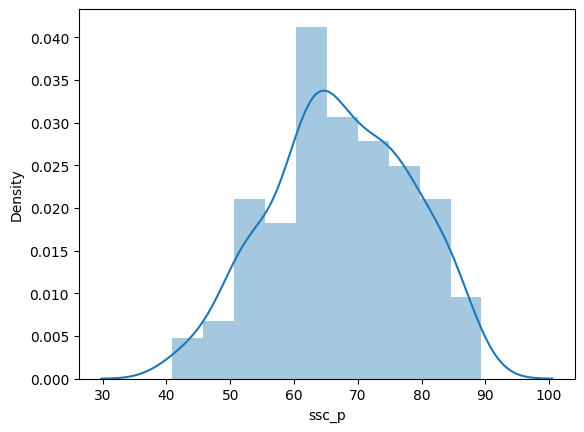

In [116]:
import seaborn as sns
sns.distplot(dataset['ssc_p'])

In [132]:
def get_PDF_probablity(dataset,startRange,endRange):
    import seaborn as sns
    from matplotlib import pyplot
    from scipy.stats import norm
    sns.distplot(dataset, kde=True,kde_kws={'color':'Blue'},color='Green')
    pyplot.axvline(startRange,color='Red')
    pyplot.axvline(endRange,color='Red')

    #mean & std calc parameter
    sample = dataset
    mean = sample.mean()
    std=sample.std()

    #define distribution
    dist = norm(mean,std)

    #sample probablities for a range of outcomes
    values = [value for value in range(startRange,endRange)]
    probablities = [dist.pdf(value) for value in values]
    prop = sum(probablities)
    print('probablities',probablities)
    return prop



### Understood from get_PDF_probablity

sns.distplot(dataset, kde=True,kde_kws={'color':'Blue'},color='Green')
plot the point.
<br>
<b>kde=True</b> : For show curve
<br>
<b>pyplot.axvline(startRange,color='Red')</b> : show start range line<br>
<b>pyplot.axvline(endRange,color='Red')</b> : show end range line
<br>
 <b>Calc </b>: mean = sample.mean(), std=sample.std(),dist = norm(mean,std)
 <br>
values = [value for value in range(startRange,endRange)] : collect the values from start,end like[1,2,3,endRange] 
<br>
probablities = [dist.pdf(value) for value in values] : calucalte PDF values

probablities [0.0015329114224828535, 0.0019267051556190002, 0.002401091837106753, 0.002966863705543068, 0.003634810156509462, 0.004415309815023451, 0.005317848311682825, 0.006350472216915636, 0.0075191960450905265, 0.008827385817478143, 0.010275148846718499, 0.011858764583155554, 0.013570194930153937, 0.015396713811418094, 0.01732069447798158, 0.019319588759641553, 0.021366125100358083, 0.023428741938312646, 0.025472260251149254, 0.027458784613159832]


C:\Users\Admin\AppData\Local\Temp\ipykernel_36124\2908202524.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset, kde=True,kde_kws={'color':'Blue'},color='Green')


0.23035961179550077

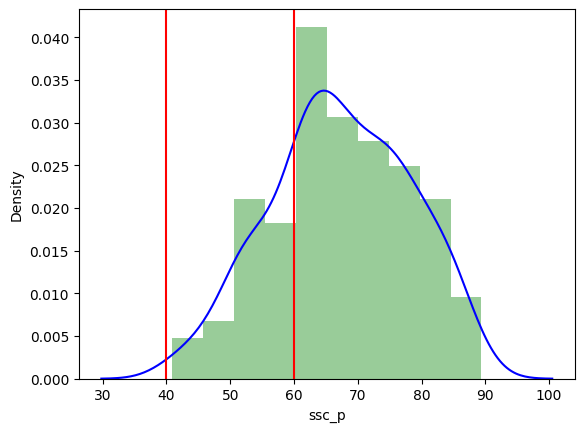

In [133]:
get_PDF_probablity(dataset['ssc_p'],40,60)

In [137]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
#find the cumulative percentage
ecdf(78)

0.827906976744186

In [135]:
#!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
